<a href="https://colab.research.google.com/github/CMDRZero/DataScienceFundamentalsClass/blob/main/Copy_of_Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 26.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [3]:
import preliz as pz

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which  we'll cover in a later unit.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

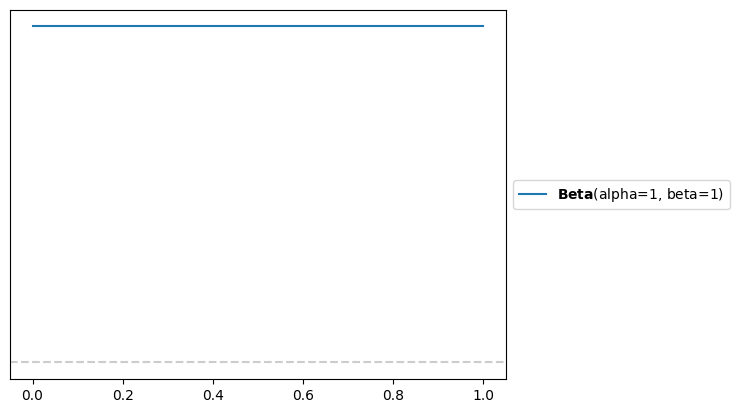

In [4]:
pz.Beta(alpha = 1, beta = 1).plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [5]:
pz.Beta(alpha = 1, beta = 1).moments()

[0.5, 0.08333333333333333, array(0.), -1.2]

**Task3**:

Plot the following distributions: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

In [6]:
ABs = [(1,1), (.9, .9), (2, 1), (1, 2), (7, 11), (96, 42)]
means = []
variences = []
skews = []
kurtosises = []

for AB in ABs:
  mean, variance, skew, kurtosis = pz.Beta(alpha = AB[0], beta = AB[1]).moments()
  means.append((mean, AB))
  variences.append((variance, AB))
  skews.append((skew, AB))
  kurtosises.append((kurtosis, AB))

smeans = sorted(means, key = lambda x:x[0])[::-1]
svariences = sorted(variences, key = lambda x:x[0])[::-1]
sskews = sorted(skews, key = lambda x:x[0])[::-1]
skurtosises = sorted(kurtosises, key = lambda x:x[0])[::-1]
smeans, svariences, skews, skurtosises
print(f"Max mean val: {smeans[0][0]}, with AB: {smeans[0][1]}")
print(f"Min mean val: {smeans[-1][0]}, with AB: {smeans[-1][1]}")
print(f"Max var val: {svariences[0][0]}, with AB: {svariences[0][1]}")
print(f"Min var val: {svariences[-1][0]}, with AB: {svariences[-1][1]}")
print(f"Max skew val: {sskews[0][0]}, with AB: {sskews[0][1]}")
print(f"Min skew val: {sskews[-1][0]}, with AB: {sskews[-1][1]}")
print(f"Max kurt val: {skurtosises[0][0]}, with AB: {skurtosises[0][1]}")
print(f"Min kurt val: {skurtosises[-1][0]}, with AB: {skurtosises[-1][1]}")

Max mean val: 0.6956521739130435, with AB: (96, 42)
Min mean val: 0.3333333333333333, with AB: (1, 2)
Max var val: 0.0892857142857143, with AB: (0.9, 0.9)
Min var val: 0.0015231670995906488, with AB: (96, 42)
Max skew val: 0.565685424949238, with AB: (1, 2)
Min skew val: -0.565685424949238, with AB: (2, 1)
Max kurt val: -0.011997937472861485, with AB: (96, 42)
Min kurt val: -1.2500000000000002, with AB: (0.9, 0.9)


###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$, $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the T distribution, use

```
support=(-4,4)
```
inside the plot_pdf function.


<Axes: >

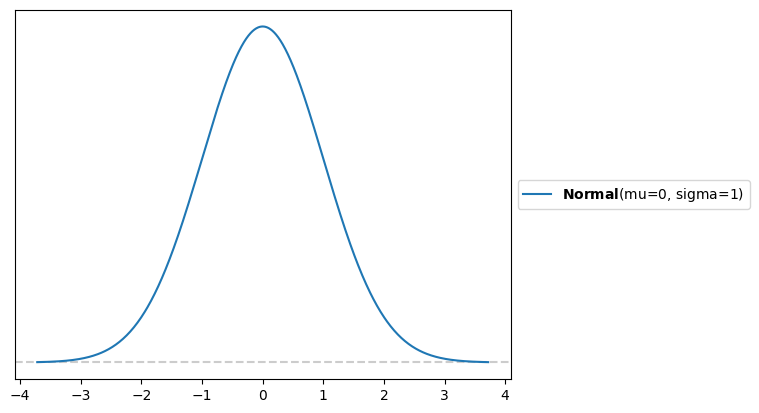

In [7]:
pz.Normal(0, 1).plot_pdf()
#pz.StudentT(1, 0, 1).plot_pdf(support = (-4, 4))
#pz.Exponential(1/2).plot_pdf()
#pz.Gamma(2, 1).plot_pdf()
#pz.HalfStudentT(1, 1).plot_pdf(support = (-4, 4));

<Axes: >

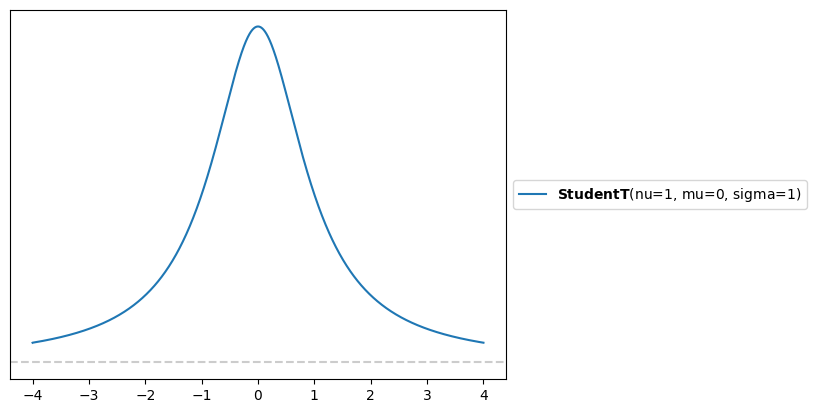

In [8]:
#pz.Normal(0, 1).plot_pdf()
pz.StudentT(1, 0, 1).plot_pdf(support = (-4, 4))
#pz.Exponential(1/2).plot_pdf()
#pz.Gamma(2, 1).plot_pdf()
#pz.HalfStudentT(1, 1).plot_pdf();

<Axes: >

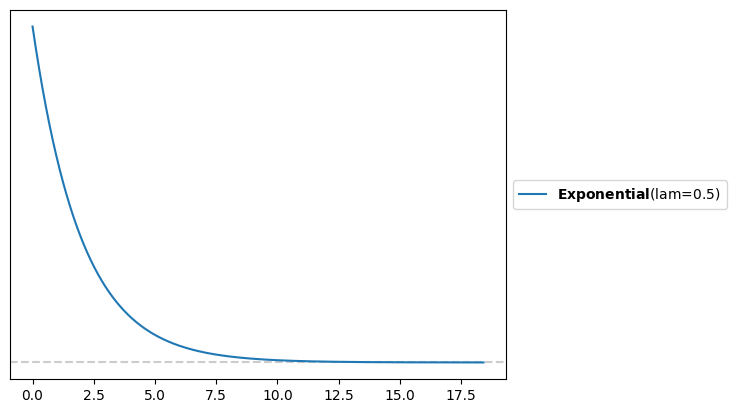

In [9]:
#pz.Normal(0, 1).plot_pdf()
#pz.StudentT(1, 0, 1).plot_pdf(support = (-4, 4))
pz.Exponential(1/2).plot_pdf()
#pz.Gamma(2, 1).plot_pdf()
#pz.HalfStudentT(1, 1).plot_pdf();

<Axes: >

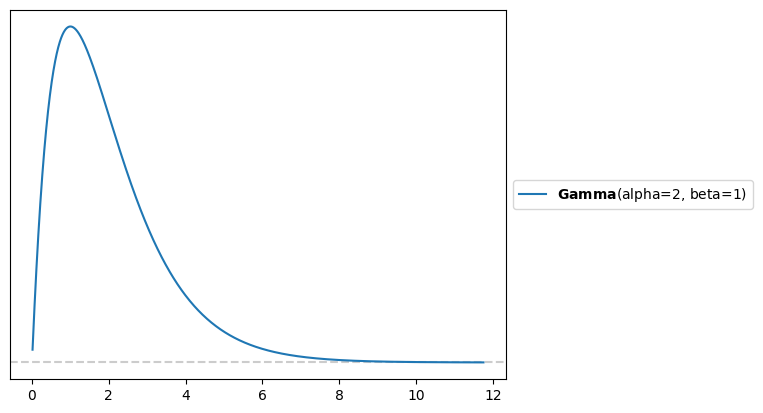

In [10]:
#pz.Normal(0, 1).plot_pdf()
#pz.StudentT(1, 0, 1).plot_pdf(support = (-4, 4))
#pz.Exponential(1/2).plot_pdf()
pz.Gamma(2, 1).plot_pdf()
#pz.HalfStudentT(1, 1).plot_pdf();

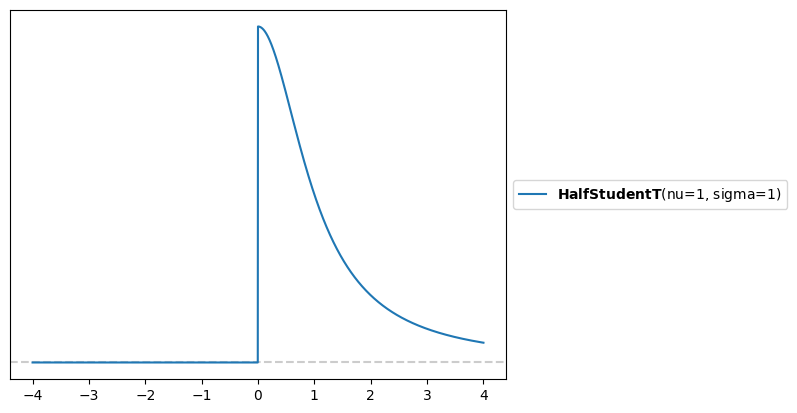

In [11]:
#pz.Normal(0, 1).plot_pdf()
#pz.StudentT(1, 0, 1).plot_pdf(support = (-4, 4))
#pz.Exponential(1/2).plot_pdf()
#pz.Gamma(2, 1).plot_pdf()
pz.HalfStudentT(1, 1).plot_pdf(support = (-4, 4));

**Task5**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? What x values do the Normal and T distribution support? What x values does the Beta distribution support?

The exponential, halfstudentT, and half Normal functions support posative values. The normal and T distributions support all real numbers, and the Beta distribution gives values between [0, 1]

**Task6**:

Can a distribution with support $[0,∞]$ have negative skew? If so, plot that specific distribution.

Yes it is, its the Weibull distribution.

[0.9181687423997607,
 0.04422997798311756,
 -0.25410960370675184,
 -0.11970993621849857]

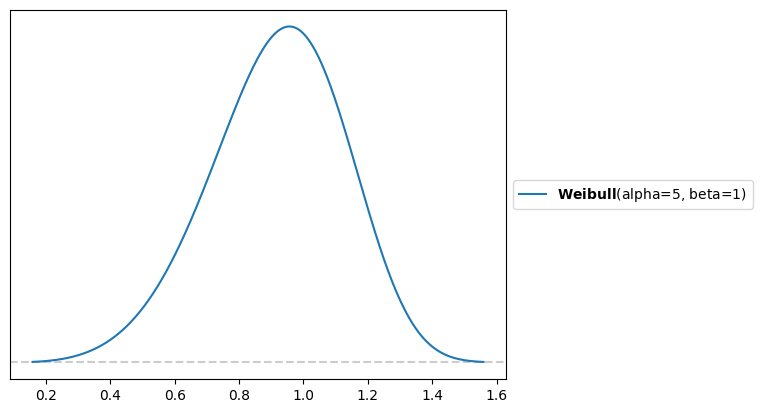

In [31]:
pz.Weibull(alpha = 5, beta = 1).plot_pdf()
pz.Weibull(alpha = 5, beta = 1).moments()

**Task7**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

In [13]:
pz.Normal(0, 1).moments() #m, v, s, k

[0.0, 1.0, 0, 0]

**Task8**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

[-0.5641895835477563,
 0.6816901138162094,
 -0.13694876731165254,
 0.0617443154193264]

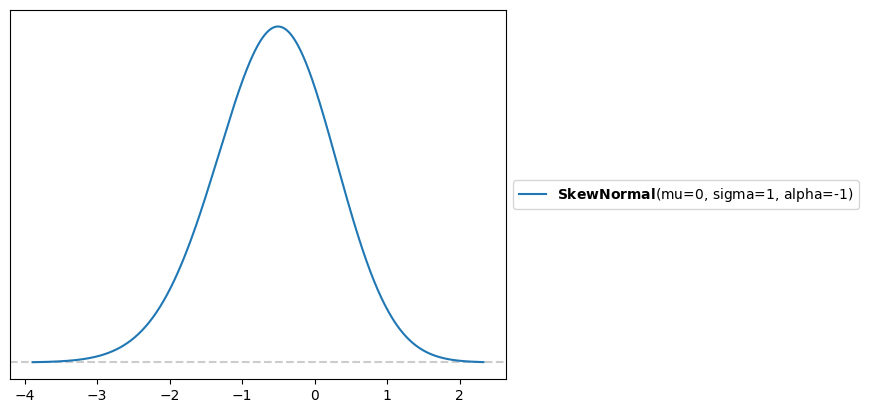

In [14]:
pz.SkewNormal(0, 1, -1).plot_pdf()
pz.SkewNormal(0, 1, -1).moments()

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(λ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

[0.7, 0.21000000000000002, -0.8728715609439692, -1.238095238095238]

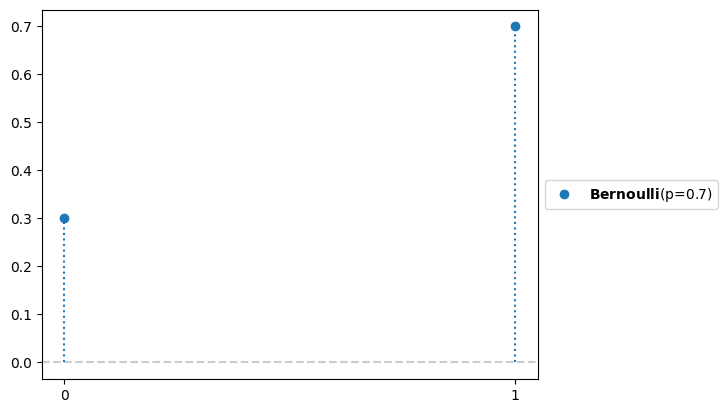

In [15]:
pz.Bernoulli(.7).plot_pdf()
pz.Bernoulli(.7).moments()

[7.0, 2.1000000000000005, -0.27602622373694163, -0.12380952380952379]

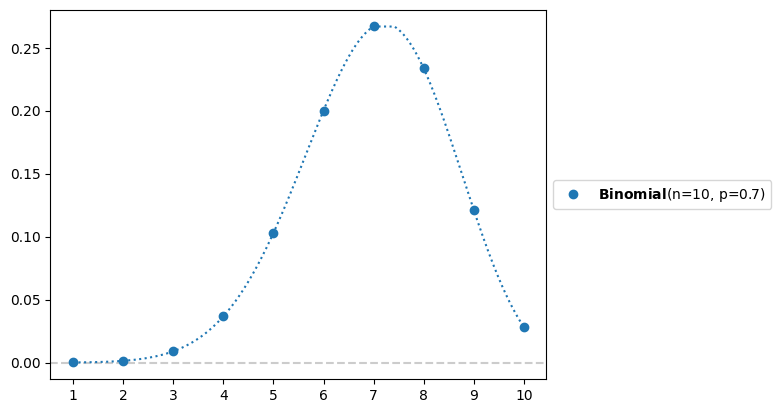

In [16]:
pz.Binomial(10, .7).plot_pdf()
pz.Binomial(10, .7).moments()

[7.0, 7.0, 0.3779644730092272, 0.14285714285714285]

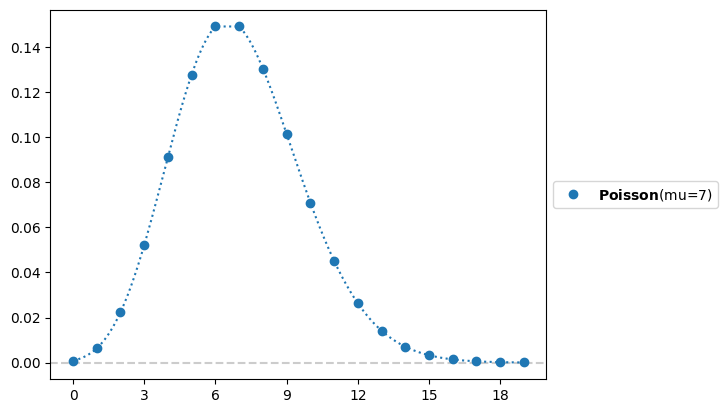

In [17]:
pz.Poisson(7).plot_pdf()
pz.Poisson(7).moments()

[1.4285714285714286, 0.6122448979591838, 2.3734644158557194, 7.633333333333333]

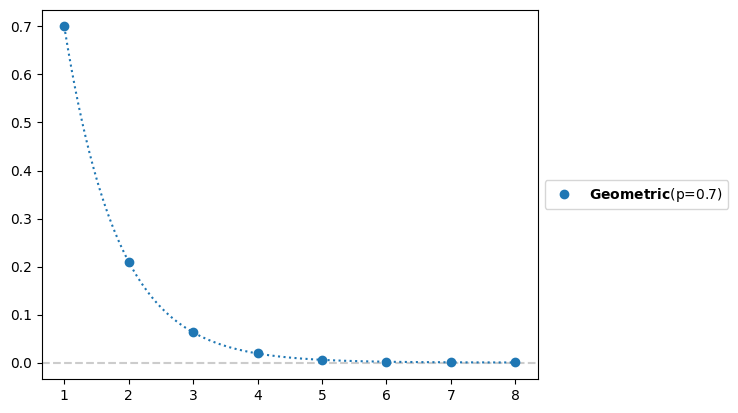

In [18]:
pz.Geometric(.7).plot_pdf()
pz.Geometric(.7).moments()

[10.5, 2.25, -0.1111111111111111, -0.08983451536643026]

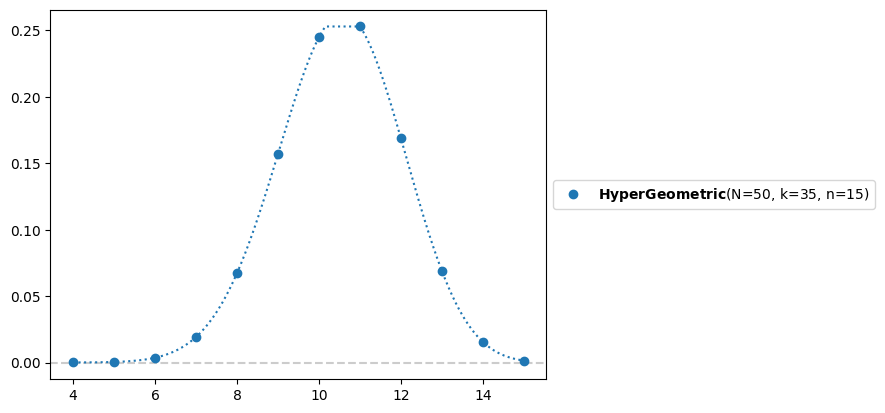

In [19]:
pz.HyperGeometric(50, 35, 15).plot_pdf()
pz.HyperGeometric(50, 35, 15).moments()

<Axes: >

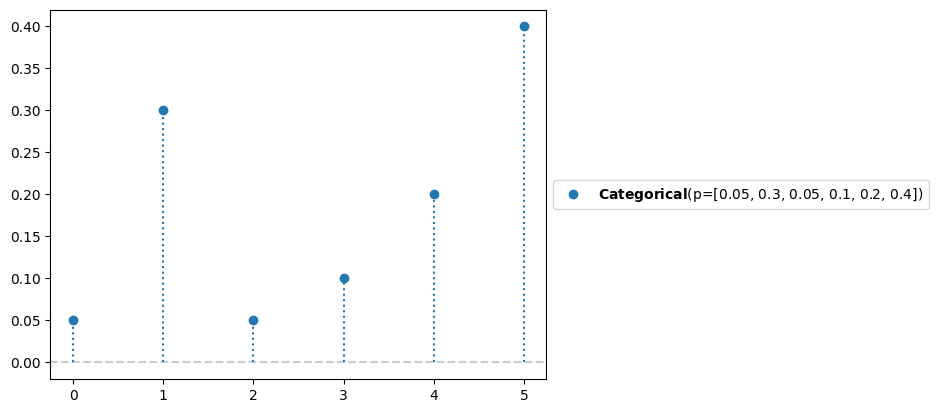

In [20]:
pz.Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4]).plot_pdf()

**Task10**:

Describe what process each of the previous discrete distributions models, and their support.

Hint: Make sure to read any of the preliZ documentation, the wikipedia articles, or wolfram alpha.


**Bernoulli**: A weighted coin flip effectively, either gives 0 or 1, with probability p. \\
**Binomial**: The probability of getting that many successes (y), given a probability (p) in n attempts. Has support: {0, 1, ... n} \\
**Poisson**: The probability of a randomly occuring event occuring y many times in a finite time frame (has expetced rate of lambda). Support of (0, inf). \\
**Geometric**: Probability of an event occuring y times successively (0, inf) \\
**HyperGeometric**: The probability of n successes drawn from K values without replacement, where there are k values of it in value. \\
**Categorical**: A distribvution where the k values given has a specified probability given. Like manually enumerating all of the cases of a discrete distribution. Support: As specified.